In [1]:
#importing libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
#loading dataset
dataset = pd.read_csv('Crimes_2001_to_2022.csv',low_memory=False)
 
dataset.head(10)

# dataset.dtypes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,9/5/2015 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,2/10/2018 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,9/4/2015 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,6,1138875.0,1904869.0,2015,2/10/2018 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,9/1/2018 0:01,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,6,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
3,10224740,HY411595,9/5/2015 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,2/10/2018 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,9/5/2015 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,2/10/2018 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,9/5/2015 10:55,082XX S LOOMIS BLVD,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,5,1168430.0,1850165.0,2015,2/10/2018 15:50,41.744379,-87.658431,"(41.744378879, -87.658430635)"
6,10224743,HY411629,9/4/2015 18:00,021XX W CHURCHILL ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,32.0,24.0,5,1161628.0,1912157.0,2015,2/10/2018 15:50,41.914636,-87.681631,"(41.914635603, -87.681630909)"
7,10224744,HY411605,9/5/2015 13:00,025XX W CERMAK RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,25.0,31.0,6,1159734.0,1889313.0,2015,9/17/2015 11:37,41.851989,-87.689219,"(41.851988885, -87.689219118)"
8,10224745,HY411654,9/5/2015 11:30,031XX W WASHINGTON BLVD,320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,True,...,27.0,27.0,3,1155536.0,1900515.0,2015,2/10/2018 15:50,41.882814,-87.704326,"(41.88281374, -87.704325717)"
9,11645836,JC212333,5/1/2016 0:25,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,4/6/2019 16:04,NaN,NaN,NaN


In [3]:
# droping the features that are not usefull
dataset=dataset.drop(columns=['ID','Case Number','Description','Updated On','Block'])
# X.shape

print('Columns in dataset: ', dataset.columns)


dataset


Columns in dataset:  Index(['Date', 'IUCR', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,9/1/2018 0:01,810,THEFT,RESIDENCE,False,True,631,6.0,8.0,44.0,6,NaN,NaN,2018,NaN,NaN,NaN
3,9/5/2015 12:45,2023,NARCOTICS,SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1/4/2001 22:30,910,MOTOR VEHICLE THEFT,STREET,False,False,621,6.0,NaN,NaN,7,1174377.0,1852400.0,2001,41.750382,-87.636574,"(41.75038194, -87.636573873)"
1048571,1/1/2001 6:42,460,BATTERY,CHA PARKING LOT/GROUNDS,False,False,925,9.0,NaN,NaN,08B,1175232.0,1879394.0,2001,41.824437,-87.632635,"(41.824437264, -87.632634617)"
1048572,1/3/2001 19:41,460,BATTERY,RESIDENCE,False,True,1423,14.0,NaN,NaN,08B,1158628.0,1907919.0,2001,41.903068,-87.692769,"(41.903068216, -87.692768777)"
1048573,1/4/2001 17:10,320,ROBBERY,SIDEWALK,False,False,221,2.0,NaN,NaN,3,1178659.0,1873955.0,2001,41.809435,-87.620228,"(41.809434812, -87.620227735)"


In [4]:
# count the number of rows that contain missing values:
dataset.isna().any(axis=1).sum()


33328

In [5]:
# droping the null value enteries 
dataset.dropna(inplace=True)

In [6]:
# counts after removal of null values from dataset
np.count_nonzero(dataset.isnull())

0

In [7]:
dataset

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,9/5/2015 12:45,2023,NARCOTICS,SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,9/5/2015 10:55,610,BURGLARY,RESIDENCE,False,False,614,6.0,21.0,71.0,5,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048205,1/3/2001 6:00,910,MOTOR VEHICLE THEFT,STREET,False,False,2533,25.0,37.0,25.0,7,1141728.0,1910856.0,2001,41.911457,-87.754774,"(41.911457184, -87.75477368)"
1048464,1/29/2019 19:00,910,MOTOR VEHICLE THEFT,STREET,False,False,2533,25.0,37.0,25.0,7,1142432.0,1908180.0,2019,41.904101,-87.752254,"(41.904100882, -87.752253974)"
1048488,10/24/2019 6:36,630,BURGLARY,RESIDENTIAL YARD (FRONT/BACK),True,False,312,3.0,20.0,42.0,5,1180341.0,1863044.0,2019,41.779456,-87.614393,"(41.779455579, -87.614393194)"
1048517,5/12/2015 17:58,1153,DECEPTIVE PRACTICE,BANK,False,False,632,6.0,6.0,44.0,11,1182609.0,1847455.0,2015,41.736625,-87.606561,"(41.736625423, -87.60656135)"


In [8]:
# Before removing Null values 1048575

# After removing Null value 1015247

# Total Null values removed 33328

In [9]:
#exploring location column
dataset['Location']

0          (41.815117282, -87.669999562)
1          (41.895080471, -87.765400451)
3          (41.937405765, -87.716649687)
4          (41.881903443, -87.755121152)
5          (41.744378879, -87.658430635)
                       ...              
1048205     (41.911457184, -87.75477368)
1048464    (41.904100882, -87.752253974)
1048488    (41.779455579, -87.614393194)
1048517     (41.736625423, -87.60656135)
1048542    (41.866998896, -87.730995218)
Name: Location, Length: 1015247, dtype: object

In [10]:
print('Current rows:', dataset.shape[0])
dataset = dataset[(((dataset.Latitude >= 41.64) & (dataset.Longitude <= -87.50)) | 
            ((dataset.Latitude <= 41.94) & (dataset.Longitude >= -87.94)))]
print('Rows after removing out of box points:', dataset.shape[0])

Current rows: 1015247
Rows after removing out of box points: 1015247


In [11]:
# # listing the crimes type wise with their counts
types=dataset['Primary Type'].value_counts().sort_values(ascending=False)
types

THEFT                                237702
BATTERY                              190834
CRIMINAL DAMAGE                      113285
ASSAULT                               73438
OTHER OFFENSE                         67052
DECEPTIVE PRACTICE                    65914
NARCOTICS                             53286
BURGLARY                              49698
MOTOR VEHICLE THEFT                   41399
ROBBERY                               41312
CRIMINAL TRESPASS                     25787
WEAPONS VIOLATION                     17856
OFFENSE INVOLVING CHILDREN             8360
PUBLIC PEACE VIOLATION                 6253
CRIM SEXUAL ASSAULT                    5210
INTERFERENCE WITH PUBLIC OFFICER       4520
SEX OFFENSE                            3792
PROSTITUTION                           3022
ARSON                                  1642
LIQUOR LAW VIOLATION                    894
GAMBLING                                755
KIDNAPPING                              740
STALKING                        

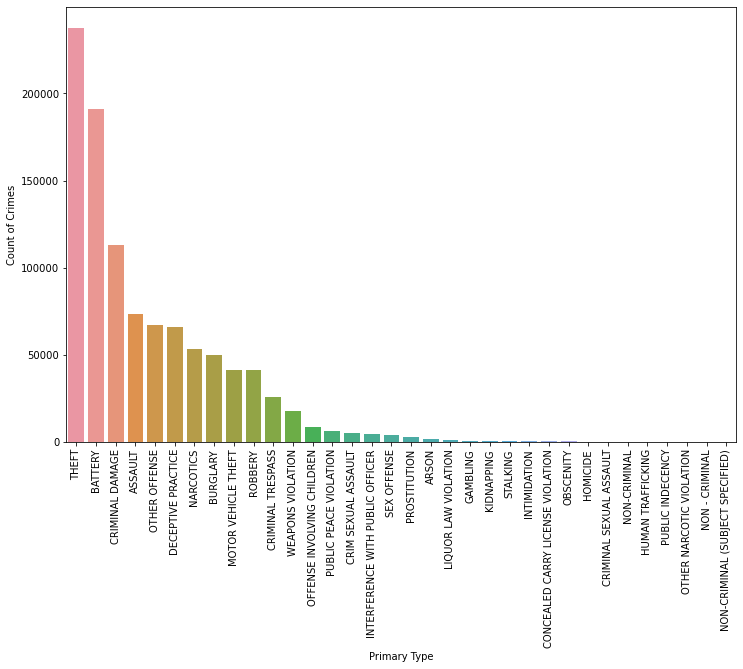

In [12]:
# plt.figure(figsize=(20,10))
# sns.countplot(data=dataset, y="Primary Type", order=dataset['Primary Type'].value_counts().index)
# plt.xticks(rotation=90)
plt.figure(figsize=(12,8))
sns.countplot(data=dataset, x="Primary Type", order=dataset['Primary Type'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('Count of Crimes')
plt.show()

In [13]:
# major crime time
#---> Storing Major Crimes
major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT']

In [14]:
# selecting the data form our dataset that belongs major crime classes
crime_df = dataset.loc[dataset['Primary Type'] .isin(major_crimes)]
crime_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,9/5/2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,9/5/2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,10/24/2019 8:48,486,BATTERY,SIDEWALK,False,True,121,1.0,42.0,28.0,08B,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)"
1047778,10/23/2019 20:00,820,THEFT,STREET,False,False,2422,24.0,49.0,1.0,6,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)"
1047805,5/13/2015 15:00,820,THEFT,SIDEWALK,False,False,823,8.0,13.0,65.0,6,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)"
1047961,10/24/2019 11:45,545,ASSAULT,RESIDENCE,True,False,623,6.0,6.0,69.0,08A,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)"


In [15]:
data = crime_df.pivot_table(index='Year', columns='Primary Type', aggfunc='count')
print(data)

# since we dont have different crimes in early years so we drop data of these years

               Arrest                                       Beat           \
Primary Type  ASSAULT  BATTERY CRIMINAL DAMAGE    THEFT  ASSAULT  BATTERY   
Year                                                                        
2001              NaN      NaN             NaN      3.0      NaN      NaN   
2008              NaN      1.0             NaN      1.0      NaN      1.0   
2009              1.0      NaN             NaN      NaN      1.0      NaN   
2010              NaN      1.0             NaN      2.0      NaN      1.0   
2011              NaN      NaN             1.0      1.0      NaN      NaN   
2012              NaN      2.0             NaN      8.0      NaN      2.0   
2013              NaN      5.0             1.0     11.0      NaN      5.0   
2014              4.0     15.0             8.0     75.0      4.0     15.0   
2015           8528.0  24796.0         15503.0  30587.0   8528.0  24796.0   
2016          18060.0  49085.0         30587.0  59255.0  18060.0  49085.0   

In [16]:
# selecting the dataset which starts from 2015
crime_df=crime_df[crime_df['Year']>=2015]
crime_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,9/5/2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,9/5/2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,10/24/2019 8:48,486,BATTERY,SIDEWALK,False,True,121,1.0,42.0,28.0,08B,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)"
1047778,10/23/2019 20:00,820,THEFT,STREET,False,False,2422,24.0,49.0,1.0,6,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)"
1047805,5/13/2015 15:00,820,THEFT,SIDEWALK,False,False,823,8.0,13.0,65.0,6,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)"
1047961,10/24/2019 11:45,545,ASSAULT,RESIDENCE,True,False,623,6.0,6.0,69.0,08A,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)"


In [17]:
temp=crime_df.copy()
temp

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,9/5/2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,9/5/2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,10/24/2019 8:48,486,BATTERY,SIDEWALK,False,True,121,1.0,42.0,28.0,08B,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)"
1047778,10/23/2019 20:00,820,THEFT,STREET,False,False,2422,24.0,49.0,1.0,6,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)"
1047805,5/13/2015 15:00,820,THEFT,SIDEWALK,False,False,823,8.0,13.0,65.0,6,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)"
1047961,10/24/2019 11:45,545,ASSAULT,RESIDENCE,True,False,623,6.0,6.0,69.0,08A,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)"


In [18]:
def crime_type(t):
    if t =='THEFT': return '0'
    elif t =='BATTERY': return '1'
    elif t =='CRIMINAL DAMAGE': return '2'
    elif t == 'ASSAULT': return '3'
    else: return '-1'

# cp_crime = crime_df.copy()
temp['crimeType'] = temp['Primary Type'].map(crime_type)
temp=temp.drop(columns='Primary Type')
temp

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType
0,9/5/2015 13:30,486,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",1
1,9/4/2015 11:30,870,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)",0
4,9/5/2015 13:00,560,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",3
7,9/5/2015 13:00,860,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)",0
10,9/5/2015 14:00,820,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,10/24/2019 8:48,486,SIDEWALK,False,True,121,1.0,42.0,28.0,08B,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)",1
1047778,10/23/2019 20:00,820,STREET,False,False,2422,24.0,49.0,1.0,6,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)",0
1047805,5/13/2015 15:00,820,SIDEWALK,False,False,823,8.0,13.0,65.0,6,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)",0
1047961,10/24/2019 11:45,545,RESIDENCE,True,False,623,6.0,6.0,69.0,08A,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)",3


In [19]:
# temp.dropna()
# drop null valules
temp.dropna(inplace=True)
temp

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType
0,9/5/2015 13:30,486,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",1
1,9/4/2015 11:30,870,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)",0
4,9/5/2015 13:00,560,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",3
7,9/5/2015 13:00,860,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)",0
10,9/5/2015 14:00,820,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,10/24/2019 8:48,486,SIDEWALK,False,True,121,1.0,42.0,28.0,08B,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)",1
1047778,10/23/2019 20:00,820,STREET,False,False,2422,24.0,49.0,1.0,6,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)",0
1047805,5/13/2015 15:00,820,SIDEWALK,False,False,823,8.0,13.0,65.0,6,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)",0
1047961,10/24/2019 11:45,545,RESIDENCE,True,False,623,6.0,6.0,69.0,08A,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)",3


In [20]:
# count of null values
temp.isna().any(axis=1).sum()

0

In [21]:
# values according to their class count
count=temp['crimeType'].value_counts().sort_values(ascending=False)
count

0    237601
1    190810
2    113275
3     73433
Name: crimeType, dtype: int64

In [22]:
nrows= temp.shape[0]
portion=math.floor(nrows/3)
portion

205039

In [23]:
first=temp.iloc[0:portion,:]
first.shape

(205039, 17)

In [24]:
nextp=portion+portion+1
scnd=temp.iloc[(portion+1):nextp,:]
scnd.shape

(205039, 17)

In [25]:
finalp=nextp+portion+1
third=temp.iloc[(nextp+1):finalp,:]
third.shape

(205039, 17)

In [26]:
# picking random 5k enteries from the first part
index=np.random.choice(portion,replace=False,size = 10000)
df_frst=first.iloc[index]
df_frst.shape

(10000, 17)

In [27]:
# picking random 5k enteries from the second half

index=np.random.choice(portion,replace=False,size = 10000)
df_scnd=scnd.iloc[index]
df_scnd

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType
430046,2/23/2017 20:00,820,PARKING LOT/GARAGE(NON.RESID.),False,False,1421,14.0,26.0,23.0,6,1155094.0,1910706.0,2017,41.910788,-87.705675,"(41.910787669, -87.705674995)",0
435350,3/4/2017 15:24,460,SMALL RETAIL STORE,False,False,215,2.0,3.0,38.0,08B,1179387.0,1873937.0,2017,41.809369,-87.617558,"(41.809368812, -87.617558131)",1
443189,3/17/2017 7:58,460,"SCHOOL, PUBLIC, GROUNDS",True,False,1712,17.0,39.0,14.0,08B,1149820.0,1932619.0,2017,41.971023,-87.724478,"(41.971022998, -87.724478132)",1
636445,1/5/2018 18:40,486,APARTMENT,True,True,313,3.0,20.0,42.0,08B,1181273.0,1865085.0,2018,41.785035,-87.610914,"(41.785034842, -87.610913544)",1
583822,8/17/2017 10:30,560,SIDEWALK,False,False,2432,24.0,49.0,1.0,08A,1167344.0,1945336.0,2017,42.005559,-87.659673,"(42.005558924, -87.659672909)",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370966,11/2/2016 3:00,810,ALLEY,False,False,2512,25.0,36.0,19.0,6,1132866.0,1915061.0,2016,41.923156,-87.787232,"(41.923155642, -87.787232013)",0
443707,3/17/2017 22:30,820,PARKING LOT/GARAGE(NON.RESID.),False,False,1122,11.0,28.0,26.0,6,1150083.0,1899369.0,2017,41.879777,-87.724379,"(41.879776919, -87.724379329)",0
563513,7/23/2017 14:30,560,STREET,False,False,433,4.0,10.0,55.0,08A,1199090.0,1819013.0,2017,41.658180,-87.547133,"(41.658180115, -87.547132679)",3
361515,10/21/2016 7:57,1310,RESIDENCE,False,True,2412,24.0,50.0,2.0,14,1160944.0,1943135.0,2016,41.999655,-87.683281,"(41.999655085, -87.683280511)",2


In [29]:
# picking random 5k enteries from the third half

index=np.random.choice(portion,replace=False,size = 10000)
df_third=third.iloc[index]
df_third

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType
918143,11/6/2018 17:15,560,STREET,False,False,1632,16.0,38.0,17.0,08A,1132814.0,1928564.0,2018,41.960210,-87.787107,"(41.960210287, -87.787106927)",3
824317,7/4/2018 20:25,820,STREET,True,False,215,2.0,3.0,38.0,6,1178510.0,1873911.0,2018,41.809317,-87.620776,"(41.809317464, -87.620775574)",0
796700,5/31/2018 13:30,560,APARTMENT,False,False,312,3.0,20.0,42.0,08A,1183210.0,1862763.0,2018,41.778618,-87.603884,"(41.778618186, -87.603883963)",3
889629,9/29/2018 12:30,1320,PARKING LOT/GARAGE(NON.RESID.),True,False,714,7.0,15.0,67.0,14,1166724.0,1863979.0,2018,41.782323,-87.664288,"(41.782322899, -87.66428794)",2
869635,1/31/2019 15:13,560,OTHER,False,False,621,6.0,17.0,68.0,08A,1172276.0,1854761.0,2019,41.756907,-87.644204,"(41.756907256, -87.64420358)",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790197,5/23/2018 9:30,850,PARKING LOT/GARAGE(NON.RESID.),False,False,1921,19.0,47.0,5.0,6,1158405.0,1922205.0,2018,41.942275,-87.693196,"(41.942274622, -87.693196175)",0
776440,5/5/2018 17:30,560,RESIDENCE PORCH/HALLWAY,False,False,832,8.0,15.0,66.0,08A,1161165.0,1861246.0,2018,41.774940,-87.684744,"(41.774940054, -87.684744445)",3
746332,8/7/2018 21:30,820,RESIDENCE,False,False,2524,25.0,35.0,22.0,6,1150973.0,1915933.0,2018,41.925213,-87.720677,"(41.925212784, -87.720676982)",0
834309,7/17/2018 5:00,486,RESIDENCE,True,True,524,5.0,34.0,53.0,08B,1167789.0,1826836.0,2018,41.680374,-87.661446,"(41.680374213, -87.661446354)",1


In [30]:
# combined all three dataframe

temp_df = pd.concat([df_frst,df_scnd],ignore_index=True)
final_df = pd.concat([temp_df,df_third],ignore_index=True)
final_df

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType
0,1/8/2016 4:00,1310,APARTMENT,False,False,2535,25.0,26.0,23.0,14,1151749.0,1909993.0,2016,41.908898,-87.717982,"(41.908897642, -87.717982184)",2
1,8/20/2015 16:52,520,CHA APARTMENT,True,False,232,2.0,20.0,40.0,04A,1178177.0,1865563.0,2015,41.786417,-87.622250,"(41.786417342, -87.622250234)",3
2,12/1/2015 23:45,486,APARTMENT,False,True,1522,15.0,29.0,25.0,08B,1139771.0,1899482.0,2015,41.880282,-87.762241,"(41.880281544, -87.762241303)",1
3,6/28/2016 21:00,820,RESIDENTIAL YARD (FRONT/BACK),False,False,2221,22.0,19.0,72.0,6,1163294.0,1844102.0,2016,41.727850,-87.677419,"(41.727850068, -87.677418917)",0
4,4/6/2016 18:45,860,SMALL RETAIL STORE,False,False,1834,18.0,42.0,8.0,6,1177342.0,1903838.0,2016,41.891466,-87.624153,"(41.891465732, -87.624153044)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,5/23/2018 9:30,850,PARKING LOT/GARAGE(NON.RESID.),False,False,1921,19.0,47.0,5.0,6,1158405.0,1922205.0,2018,41.942275,-87.693196,"(41.942274622, -87.693196175)",0
29996,5/5/2018 17:30,560,RESIDENCE PORCH/HALLWAY,False,False,832,8.0,15.0,66.0,08A,1161165.0,1861246.0,2018,41.774940,-87.684744,"(41.774940054, -87.684744445)",3
29997,8/7/2018 21:30,820,RESIDENCE,False,False,2524,25.0,35.0,22.0,6,1150973.0,1915933.0,2018,41.925213,-87.720677,"(41.925212784, -87.720676982)",0
29998,7/17/2018 5:00,486,RESIDENCE,True,True,524,5.0,34.0,53.0,08B,1167789.0,1826836.0,2018,41.680374,-87.661446,"(41.680374213, -87.661446354)",1


In [31]:
df=final_df.copy()

In [32]:
# Using PCA to combine two features

from sklearn.decomposition import PCA

location = df[['Latitude','Longitude']]
pca = PCA(n_components=1,random_state=123)
locat = pca.fit_transform(location)
df['Location'] = locat
df

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType
0,1/8/2016 4:00,1310,APARTMENT,False,False,2535,25.0,26.0,23.0,14,1151749.0,1909993.0,2016,41.908898,-87.717982,-0.079447,2
1,8/20/2015 16:52,520,CHA APARTMENT,True,False,232,2.0,20.0,40.0,04A,1178177.0,1865563.0,2015,41.786417,-87.622250,0.072796,3
2,12/1/2015 23:45,486,APARTMENT,False,True,1522,15.0,29.0,25.0,08B,1139771.0,1899482.0,2015,41.880282,-87.762241,-0.073445,1
3,6/28/2016 21:00,820,RESIDENTIAL YARD (FRONT/BACK),False,False,2221,22.0,19.0,72.0,6,1163294.0,1844102.0,2016,41.727850,-87.677419,0.100797,0
4,4/6/2016 18:45,860,SMALL RETAIL STORE,False,False,1834,18.0,42.0,8.0,6,1177342.0,1903838.0,2016,41.891466,-87.624153,-0.022186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,5/23/2018 9:30,850,PARKING LOT/GARAGE(NON.RESID.),False,False,1921,19.0,47.0,5.0,6,1158405.0,1922205.0,2018,41.942275,-87.693196,-0.098358,0
29996,5/5/2018 17:30,560,RESIDENCE PORCH/HALLWAY,False,False,832,8.0,15.0,66.0,08A,1161165.0,1861246.0,2018,41.774940,-87.684744,0.055347,3
29997,8/7/2018 21:30,820,RESIDENCE,False,False,2524,25.0,35.0,22.0,6,1150973.0,1915933.0,2018,41.925213,-87.720677,-0.095264,0
29998,7/17/2018 5:00,486,RESIDENCE,True,True,524,5.0,34.0,53.0,08B,1167789.0,1826836.0,2018,41.680374,-87.661446,0.150430,1


In [33]:
# convertung date column to actual date format
df.Date=pd.to_datetime(df.Date)

df.head(10)

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType
0,2016-01-08 04:00:00,1310,APARTMENT,False,False,2535,25.0,26.0,23.0,14,1151749.0,1909993.0,2016,41.908898,-87.717982,-0.079447,2
1,2015-08-20 16:52:00,520,CHA APARTMENT,True,False,232,2.0,20.0,40.0,04A,1178177.0,1865563.0,2015,41.786417,-87.622250,0.072796,3
2,2015-12-01 23:45:00,486,APARTMENT,False,True,1522,15.0,29.0,25.0,08B,1139771.0,1899482.0,2015,41.880282,-87.762241,-0.073445,1
3,2016-06-28 21:00:00,820,RESIDENTIAL YARD (FRONT/BACK),False,False,2221,22.0,19.0,72.0,6,1163294.0,1844102.0,2016,41.727850,-87.677419,0.100797,0
4,2016-04-06 18:45:00,860,SMALL RETAIL STORE,False,False,1834,18.0,42.0,8.0,6,1177342.0,1903838.0,2016,41.891466,-87.624153,-0.022186,0
5,2015-10-20 16:50:00,430,GROCERY FOOD STORE,False,False,731,7.0,6.0,69.0,04B,1176581.0,1857588.0,2015,41.764569,-87.628342,0.089671,1
6,2016-09-02 06:35:00,1310,SIDEWALK,False,False,224,2.0,3.0,38.0,14,1178199.0,1871246.0,2016,41.802012,-87.621997,0.058934,2
7,2015-10-30 20:00:00,560,RESIDENCE,False,False,811,8.0,23.0,56.0,08A,1129365.0,1864797.0,2015,41.785284,-87.801241,-0.005621,3
8,2016-08-15 01:32:00,820,STREET,False,False,2412,24.0,50.0,2.0,6,1158815.0,1942703.0,2016,41.998514,-87.691124,-0.147836,0
9,2016-07-21 13:00:00,486,APARTMENT,False,True,712,7.0,16.0,68.0,08B,1170364.0,1864161.0,2016,41.782744,-87.650937,0.063357,1


In [34]:
# extracting month and weekday from date column
df['month']=df.Date.dt.month
df['weekday'] = df.Date.dt.day_of_week
df=df.drop(columns='Date')
df

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType,month,weekday
0,1310,APARTMENT,False,False,2535,25.0,26.0,23.0,14,1151749.0,1909993.0,2016,41.908898,-87.717982,-0.079447,2,1,4
1,520,CHA APARTMENT,True,False,232,2.0,20.0,40.0,04A,1178177.0,1865563.0,2015,41.786417,-87.622250,0.072796,3,8,3
2,486,APARTMENT,False,True,1522,15.0,29.0,25.0,08B,1139771.0,1899482.0,2015,41.880282,-87.762241,-0.073445,1,12,1
3,820,RESIDENTIAL YARD (FRONT/BACK),False,False,2221,22.0,19.0,72.0,6,1163294.0,1844102.0,2016,41.727850,-87.677419,0.100797,0,6,1
4,860,SMALL RETAIL STORE,False,False,1834,18.0,42.0,8.0,6,1177342.0,1903838.0,2016,41.891466,-87.624153,-0.022186,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,850,PARKING LOT/GARAGE(NON.RESID.),False,False,1921,19.0,47.0,5.0,6,1158405.0,1922205.0,2018,41.942275,-87.693196,-0.098358,0,5,2
29996,560,RESIDENCE PORCH/HALLWAY,False,False,832,8.0,15.0,66.0,08A,1161165.0,1861246.0,2018,41.774940,-87.684744,0.055347,3,5,5
29997,820,RESIDENCE,False,False,2524,25.0,35.0,22.0,6,1150973.0,1915933.0,2018,41.925213,-87.720677,-0.095264,0,8,1
29998,486,RESIDENCE,True,True,524,5.0,34.0,53.0,08B,1167789.0,1826836.0,2018,41.680374,-87.661446,0.150430,1,7,1


In [35]:
cp_crime = df.copy()

In [36]:
# encoding our column with labels to nos
labelEncoder = LabelEncoder()

locDes_enc = labelEncoder.fit_transform(cp_crime['Location Description'])
cp_crime['Location Description'] = locDes_enc

cp_crime.head()

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType,month,weekday
0,1310,16,False,False,2535,25.0,26.0,23.0,14,1151749.0,1909993.0,2016,41.908898,-87.717982,-0.079447,2,1,4
1,520,29,True,False,232,2.0,20.0,40.0,04A,1178177.0,1865563.0,2015,41.786417,-87.622250,0.072796,3,8,3
2,486,16,False,True,1522,15.0,29.0,25.0,08B,1139771.0,1899482.0,2015,41.880282,-87.762241,-0.073445,1,12,1
3,820,89,False,False,2221,22.0,19.0,72.0,6,1163294.0,1844102.0,2016,41.727850,-87.677419,0.100797,0,6,1
4,860,98,False,False,1834,18.0,42.0,8.0,6,1177342.0,1903838.0,2016,41.891466,-87.624153,-0.022186,0,4,2


In [37]:
# encoding our column with labels to nos
labelEncoder2 = LabelEncoder()

arrest_enc = labelEncoder2.fit_transform(cp_crime['Arrest'])
cp_crime['Arrest'] = arrest_enc

cp_crime.head()

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType,month,weekday
0,1310,16,0,False,2535,25.0,26.0,23.0,14,1151749.0,1909993.0,2016,41.908898,-87.717982,-0.079447,2,1,4
1,520,29,1,False,232,2.0,20.0,40.0,04A,1178177.0,1865563.0,2015,41.786417,-87.622250,0.072796,3,8,3
2,486,16,0,True,1522,15.0,29.0,25.0,08B,1139771.0,1899482.0,2015,41.880282,-87.762241,-0.073445,1,12,1
3,820,89,0,False,2221,22.0,19.0,72.0,6,1163294.0,1844102.0,2016,41.727850,-87.677419,0.100797,0,6,1
4,860,98,0,False,1834,18.0,42.0,8.0,6,1177342.0,1903838.0,2016,41.891466,-87.624153,-0.022186,0,4,2


In [38]:
# encoding our column with labels to nos
labelEncoder3 = LabelEncoder()

domestic_enc = labelEncoder3.fit_transform(cp_crime['Domestic'])
cp_crime['Domestic'] = domestic_enc

cp_crime.head()

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType,month,weekday
0,1310,16,0,0,2535,25.0,26.0,23.0,14,1151749.0,1909993.0,2016,41.908898,-87.717982,-0.079447,2,1,4
1,520,29,1,0,232,2.0,20.0,40.0,04A,1178177.0,1865563.0,2015,41.786417,-87.622250,0.072796,3,8,3
2,486,16,0,1,1522,15.0,29.0,25.0,08B,1139771.0,1899482.0,2015,41.880282,-87.762241,-0.073445,1,12,1
3,820,89,0,0,2221,22.0,19.0,72.0,6,1163294.0,1844102.0,2016,41.727850,-87.677419,0.100797,0,6,1
4,860,98,0,0,1834,18.0,42.0,8.0,6,1177342.0,1903838.0,2016,41.891466,-87.624153,-0.022186,0,4,2


In [39]:
# feature scaling
scaler = preprocessing.MinMaxScaler()
cp_crime[['Beat']] = scaler.fit_transform(cp_crime[['Beat']])
cp_crime[['Location Description']] = scaler.fit_transform(cp_crime[['Location Description']])
cp_crime[['X Coordinate', 'Y Coordinate']] = scaler.fit_transform(cp_crime[['X Coordinate', 'Y Coordinate']])
cp_crime

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType,month,weekday
0,1310,0.145455,0,0,1.000000,25.0,26.0,23.0,14,0.496423,0.698364,2016,41.908898,-87.717982,-0.079447,2,1,4
1,520,0.263636,1,0,0.049917,2.0,20.0,40.0,04A,0.745847,0.375432,2015,41.786417,-87.622250,0.072796,3,8,3
2,486,0.145455,0,1,0.582096,15.0,29.0,25.0,08B,0.383376,0.621966,2015,41.880282,-87.762241,-0.073445,1,12,1
3,820,0.809091,0,0,0.870462,22.0,19.0,72.0,6,0.605383,0.219446,2016,41.727850,-87.677419,0.100797,0,6,1
4,860,0.890909,0,0,0.710809,18.0,42.0,8.0,6,0.737967,0.653627,2016,41.891466,-87.624153,-0.022186,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,850,0.718182,0,0,0.746700,19.0,47.0,5.0,6,0.559242,0.787125,2018,41.942275,-87.693196,-0.098358,0,5,2
29996,560,0.790909,0,0,0.297442,8.0,15.0,66.0,08A,0.585290,0.344054,2018,41.774940,-87.684744,0.055347,3,5,5
29997,820,0.754545,0,0,0.995462,25.0,35.0,22.0,6,0.489099,0.741538,2018,41.925213,-87.720677,-0.095264,0,8,1
29998,486,0.754545,1,1,0.170380,5.0,34.0,53.0,08B,0.647807,0.093951,2018,41.680374,-87.661446,0.150430,1,7,1


In [40]:
# using correlation for the feature selection
corelation = cp_crime.corr()
corelation

,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday
Location Description,1.000000,-0.087989,-0.224288,0.026321,0.026703,0.007374,-0.015842,-0.003229,-0.010893,-0.033111,-0.010834,-0.003346,0.008026,0.020984,-0.012664
Arrest,-0.087989,1.000000,0.078355,-0.011130,-0.011199,-0.009479,0.010699,0.018668,-0.020745,-0.008802,-0.020778,0.018485,0.022319,-0.020326,0.008915
Domestic,-0.224288,0.078355,1.000000,-0.068510,-0.068600,-0.107391,0.131518,-0.003400,-0.145238,0.009136,-0.144931,-0.005755,0.118217,-0.010474,0.029144
Beat,0.026321,-0.011130,-0.068510,1.000000,0.999926,0.632649,-0.494842,-0.542931,0.622484,0.002407,0.623331,-0.537718,-0.664875,-0.003299,0.017226
District,0.026703,-0.011199,-0.068600,0.999926,1.000000,0.634254,-0.495592,-0.543684,0.623806,0.002403,0.624653,-0.538455,-0.666173,-0.003337,0.017142
Ward,0.007374,-0.009479,-0.107391,0.632649,0.634254,1.000000,-0.534493,-0.412926,0.649578,0.019687,0.649851,-0.406205,-0.650222,-0.003988,0.014772
Community Area,-0.015842,0.010699,0.131518,-0.494842,-0.495592,-0.534493,1.000000,0.226027,-0.780279,-0.012243,-0.779551,0.215899,0.704518,-0.004706,-0.017335
X Coordinate,-0.003229,0.018668,-0.003400,-0.542931,-0.543684,-0.412926,0.226027,1.000000,-0.528459,0.007672,-0.531244,0.999913,0.717295,0.008000,-0.000073
Y Coordinate,-0.010893,-0.020745,-0.145238,0.622484,0.623806,0.649578,-0.780279,-0.528459,1.000000,0.010536,0.999995,-0.517291,-0.970590,0.001506,0.007336
Year,-0.033111,-0.008802,0.009136,0.002407,0.002403,0.019687,-0.012243,0.007672,0.010536,1.000000,0.010487,0.007908,-0.006470,-0.302021,-0.001569


<AxesSubplot:>

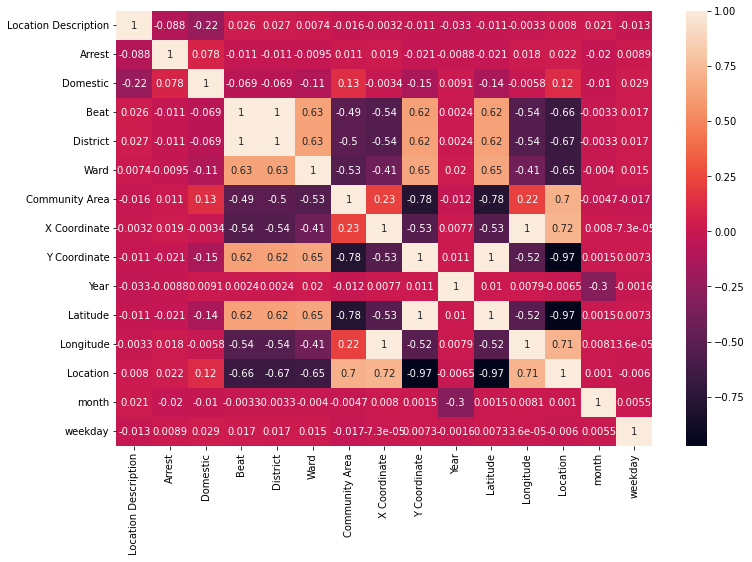

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(corelation,annot=True)

In [42]:
cp_crime

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType,month,weekday
0,1310,0.145455,0,0,1.000000,25.0,26.0,23.0,14,0.496423,0.698364,2016,41.908898,-87.717982,-0.079447,2,1,4
1,520,0.263636,1,0,0.049917,2.0,20.0,40.0,04A,0.745847,0.375432,2015,41.786417,-87.622250,0.072796,3,8,3
2,486,0.145455,0,1,0.582096,15.0,29.0,25.0,08B,0.383376,0.621966,2015,41.880282,-87.762241,-0.073445,1,12,1
3,820,0.809091,0,0,0.870462,22.0,19.0,72.0,6,0.605383,0.219446,2016,41.727850,-87.677419,0.100797,0,6,1
4,860,0.890909,0,0,0.710809,18.0,42.0,8.0,6,0.737967,0.653627,2016,41.891466,-87.624153,-0.022186,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,850,0.718182,0,0,0.746700,19.0,47.0,5.0,6,0.559242,0.787125,2018,41.942275,-87.693196,-0.098358,0,5,2
29996,560,0.790909,0,0,0.297442,8.0,15.0,66.0,08A,0.585290,0.344054,2018,41.774940,-87.684744,0.055347,3,5,5
29997,820,0.754545,0,0,0.995462,25.0,35.0,22.0,6,0.489099,0.741538,2018,41.925213,-87.720677,-0.095264,0,8,1
29998,486,0.754545,1,1,0.170380,5.0,34.0,53.0,08B,0.647807,0.093951,2018,41.680374,-87.661446,0.150430,1,7,1


In [43]:
# month week day have low correlation they isn't effect our results so we drop them
# since beat have high correlation with district so we drop beat
# and X cordinate have high correlation with longitube and Y cordinate with latitude and location so we drop longitude and latitude
# 'Beat'
selected_cols=['Location Description','Arrest','Domestic','Beat','Ward','Community Area','X Coordinate','Y Coordinate','Year','crimeType'] 


In [44]:
cp_crime = cp_crime.sample(frac=1)
cp_crime

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType,month,weekday
27890,890,0.663636,0,0,0.004538,1.0,42.0,32.0,6,0.706189,0.616966,2019,41.877700,-87.636669,-0.015405,0,3,4
6183,870,0.427273,0,0,0.709983,18.0,42.0,8.0,6,0.727406,0.667924,2016,41.896889,-87.628203,-0.028843,0,9,5
22244,560,0.245455,0,0,0.544967,14.0,32.0,22.0,08A,0.613849,0.722778,2019,41.917861,-87.672181,-0.067154,3,2,5
28120,560,0.754545,0,1,0.215347,6.0,8.0,44.0,08A,0.792923,0.221474,2018,41.728177,-87.604620,0.132811,3,9,5
29502,890,0.654545,0,0,0.380776,10.0,12.0,30.0,6,0.556910,0.517731,2017,41.840573,-87.695117,-0.008072,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13503,810,0.909091,0,0,0.582096,15.0,29.0,25.0,6,0.394192,0.612321,2017,41.876619,-87.758066,-0.068310,0,8,0
13874,560,0.663636,1,0,0.412954,11.0,27.0,23.0,08A,0.483257,0.681872,2017,41.902699,-87.723166,-0.076193,3,7,6
11781,820,0.909091,0,0,0.458746,12.0,2.0,28.0,6,0.594096,0.625717,2017,41.881261,-87.680244,-0.037933,0,4,3
18556,460,0.881818,0,0,0.294142,8.0,14.0,63.0,08B,0.552682,0.377350,2017,41.787582,-87.697286,0.038453,1,6,0


In [45]:
cp_crime = cp_crime[selected_cols]
cp_crime

,Location Description,Arrest,Domestic,Beat,Ward,Community Area,X Coordinate,Y Coordinate,Year,crimeType
27890,0.663636,0,0,0.004538,42.0,32.0,0.706189,0.616966,2019,0
6183,0.427273,0,0,0.709983,42.0,8.0,0.727406,0.667924,2016,0
22244,0.245455,0,0,0.544967,32.0,22.0,0.613849,0.722778,2019,3
28120,0.754545,0,1,0.215347,8.0,44.0,0.792923,0.221474,2018,3
29502,0.654545,0,0,0.380776,12.0,30.0,0.556910,0.517731,2017,0
...,...,...,...,...,...,...,...,...,...,...
13503,0.909091,0,0,0.582096,29.0,25.0,0.394192,0.612321,2017,0
13874,0.663636,1,0,0.412954,27.0,23.0,0.483257,0.681872,2017,3
11781,0.909091,0,0,0.458746,2.0,28.0,0.594096,0.625717,2017,0
18556,0.881818,0,0,0.294142,14.0,63.0,0.552682,0.377350,2017,1


In [46]:
from sklearn.model_selection import train_test_split
# Split the data into 70% train and 30% test 
train_df, temp_test_df =  train_test_split(cp_crime, test_size=0.3)

print( train_df.shape )
print( temp_test_df.shape )

(21000, 10)
(9000, 10)


In [47]:
# Split the test_dataset dataframe to 50% test and 50% validation. 
test_df, valid_df =  train_test_split(temp_test_df, test_size=0.5)
print( test_df.shape )
print( valid_df.shape )

(4500, 10)
(4500, 10)


In [48]:
print(f" Shape of Train dataset       : {train_df.shape}")
print(f" Shape of Test dataset        : {test_df.shape}")
print(f" Shape of Validation dataset  : {valid_df.shape}")

 Shape of Train dataset       : (21000, 10)
 Shape of Test dataset        : (4500, 10)
 Shape of Validation dataset  : (4500, 10)


In [49]:
train_df

,Location Description,Arrest,Domestic,Beat,Ward,Community Area,X Coordinate,Y Coordinate,Year,crimeType
18319,0.909091,0,1,0.870462,21.0,73.0,0.635651,0.225936,2017,3
21302,0.145455,0,1,0.257426,17.0,67.0,0.617266,0.325520,2018,1
22285,0.754545,0,0,0.413779,28.0,26.0,0.470894,0.628108,2019,3
13061,0.890909,1,0,0.000000,42.0,32.0,0.728623,0.632469,2016,0
19578,0.890909,1,0,0.297855,13.0,65.0,0.439588,0.289353,2017,0
...,...,...,...,...,...,...,...,...,...,...
8775,0.518182,0,0,0.087459,6.0,69.0,0.740166,0.301273,2015,0
21401,0.881818,0,0,0.004538,42.0,32.0,0.709870,0.620375,2018,1
22723,0.663636,0,0,0.705858,27.0,8.0,0.658056,0.704360,2018,0
26235,0.518182,0,0,0.170380,34.0,53.0,0.697440,0.106001,2018,0


In [50]:
# Statistics on the train dataset to make sure it is in a good shape.
train_stats = train_df.describe()

train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Location Description,21000.0,0.664186,0.281402,0.000000,0.463636,0.754545,0.890909,1.0
Arrest,21000.0,0.138619,0.345557,0.000000,0.000000,0.000000,0.000000,1.0
Domestic,21000.0,0.219905,0.414192,0.000000,0.000000,0.000000,0.000000,1.0
Beat,21000.0,0.422885,0.288792,0.000000,0.174092,0.376238,0.665017,1.0
Ward,21000.0,23.198476,14.275601,1.000000,10.000000,23.000000,35.000000,50.0
Community Area,21000.0,36.582762,21.531197,1.000000,22.000000,32.000000,54.000000,77.0
X Coordinate,21000.0,0.625661,0.151597,0.000698,0.519376,0.643413,0.731879,1.0
Y Coordinate,21000.0,0.528476,0.226689,0.000000,0.329416,0.580922,0.694857,1.0
Year,21000.0,2016.956095,1.216181,2015.000000,2016.000000,2017.000000,2018.000000,2020.0


In [51]:
# stroing the target labebls 
train_labels1 = train_df.pop('crimeType')

In [52]:
train_labels1

18319    3
21302    1
22285    3
13061    0
19578    0
        ..
8775     0
21401    1
22723    0
26235    0
1277     0
Name: crimeType, Length: 21000, dtype: object

In [53]:
test_labels1 = test_df.pop('crimeType')
test_labels1

15522    0
6918     1
9991     2
26870    1
16051    1
        ..
27064    0
11271    0
13208    3
16541    1
2254     1
Name: crimeType, Length: 4500, dtype: object

In [54]:
valid_labels1 = valid_df.pop('crimeType')
valid_labels1

18994    3
26955    3
9087     2
23479    2
16916    1
        ..
22535    1
18193    1
6903     0
4758     3
1122     0
Name: crimeType, Length: 4500, dtype: object

In [55]:
# scalled_train_data

In [56]:
# Encode the labeles
train_labels = pd.get_dummies(train_labels1, prefix='Label')
valid_labels = pd.get_dummies(valid_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')

train_labels

,Label_0,Label_1,Label_2,Label_3
18319,0,0,0,1
21302,0,1,0,0
22285,0,0,0,1
13061,1,0,0,0
19578,1,0,0,0
...,...,...,...,...
8775,1,0,0,0
21401,0,1,0,0
22723,1,0,0,0
26235,1,0,0,0


In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scalled_train_data = sc.fit_transform(train_df)
scalled_test_data = sc.fit_transform(test_df)
scalled_valid_data = sc.fit_transform(valid_df)

In [58]:
scalled_train_data

array([[ 0.87032193, -0.40115649,  1.88346041, ...,  0.06589838,
        -1.33463793,  0.03610139],
       [-1.84342471, -0.40115649,  1.88346041, ..., -0.05537967,
        -0.89533097,  0.85836729],
       [ 0.3211113 , -0.40115649, -0.53093763, ..., -1.02093473,
         0.43951962,  1.68063318],
       ...,
       [-0.00195377, -0.40115649, -0.53093763, ...,  0.21369822,
         0.77590158,  0.85836729],
       [-0.5188579 , -0.40115649, -0.53093763, ...,  0.47349971,
        -1.8637237 ,  0.85836729],
       [ 1.12877399, -0.40115649, -0.53093763, ..., -1.4832606 ,
         0.97857725, -0.78616451]])

In [59]:
# Tensorflow and Keras are two packages for creating neural network models.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers

In [98]:
#  Creating a model.
def build_model():
    model = Sequential()
    model.add(Dense(600,activation='relu', input_shape = (scalled_train_data.shape[1],)  ))        #18
    model.add(Dropout(0.1))
    model.add(Dense(550,  activation='relu'))         #17
    model.add(Dropout(0.1))
    model.add(Dense(500,  activation='relu'))        #16
    model.add(Dropout(0.1))
    model.add(Dense(450,  activation='relu'))         #15
    model.add(Dropout(0.1))
    model.add(Dense(400,  activation='relu'))        #14
    model.add(Dropout(0.1))
    model.add(Dense(350,  activation='relu'))        #13
    model.add(Dropout(0.1))
    model.add(Dense(300,  activation='relu'))         #12
    model.add(Dropout(0.1))
    model.add(Dense(250,  activation='relu'))        #11
    model.add(Dropout(0.1))
    model.add(Dense(200,  activation='relu'))        #10
    model.add(Dropout(0.1))
    model.add(Dense(180,  activation='relu'))        #9
    model.add(Dropout(0.1))
    model.add(Dense(160,  activation='relu'))        #8
    model.add(Dropout(0.1))
    model.add(Dense(140,  activation='relu'))           #7
    model.add(Dropout(0.1))
    model.add(Dense(120,  activation='relu'))          #6
    model.add(Dropout(0.1))
    model.add(Dense(100,  activation='relu'))          #5
    model.add(Dropout(0.1))
    model.add(Dense(80,  activation='relu'))             #4
    model.add(Dropout(0.1))
    model.add(Dense(60,  activation='relu'))             #3
    model.add(Dropout(0.1))
    model.add(Dense(40,  activation='relu'))            #2
    model.add(Dropout(0.1))
    model.add(Dense(20, activation='softmax'))           #1                          
   
    learning_rate = 0.01
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model

In [99]:
model = build_model()
print('Here is a summary of this model: ')
model.summary()

Here is a summary of this model: 
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 600)               6000      
_________________________________________________________________
dropout_23 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 550)               330550    
_________________________________________________________________
dropout_24 (Dropout)         (None, 550)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 500)               275500    
_________________________________________________________________
dropout_25 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_33 (Dense)    

In [76]:
# def FindBatchSize(model):
#     """#model: model architecture, that is yet to be trained"""
#     import os, sys, psutil, gc, tensorflow, keras
#     import numpy as np
#     from keras import backend as K
#     BatchFound= 16

#     try:
#         total_params= int(model.count_params());    GCPU= "CPU"
#         #find whether gpu is available
#         try:
#             if K.tensorflow_backend._get_available_gpus()== []:
#                 GCPU= "CPU";    #CPU and Cuda9GPU
#             else:
#                 GCPU= "GPU"
#         except:
#             from tensorflow.python.client import device_lib;    #Cuda8GPU
#             def get_available_gpus():
#                 local_device_protos= device_lib.list_local_devices()
#                 return [x.name for x in local_device_protos if x.device_type == 'GPU']
#             if "gpu" not in str(get_available_gpus()).lower():
#                 GCPU= "CPU"
#             else:
#                 GCPU= "GPU"

#         #decide batch size on the basis of GPU availability and model complexity
#         if (GCPU== "GPU") and (os.cpu_count() >15) and (total_params <1000000):
#             BatchFound= 64    
#         if (os.cpu_count() <16) and (total_params <500000):
#             BatchFound= 64  
#         if (GCPU== "GPU") and (os.cpu_count() >15) and (total_params <2000000) and (total_params >=1000000):
#             BatchFound= 32      
#         if (GCPU== "GPU") and (os.cpu_count() >15) and (total_params >=2000000) and (total_params <10000000):
#             BatchFound= 16  
#         if (GCPU== "GPU") and (os.cpu_count() >15) and (total_params >=10000000):
#             BatchFound= 8       
#         if (os.cpu_count() <16) and (total_params >5000000):
#             BatchFound= 8    
#         if total_params >100000000:
#             BatchFound= 1

#     except:
#         pass
#     try:

#         #find percentage of memory used
#         memoryused= psutil.virtual_memory()
#         memoryused= float(str(memoryused).replace(" ", "").split("percent=")[1].split(",")[0])
#         if memoryused >75.0:
#             BatchFound= 8
#         if memoryused >85.0:
#             BatchFound= 4
#         if memoryused >90.0:
#             BatchFound= 2
#         if total_params >100000000:
#             BatchFound= 1
#         print("Batch Size:  "+ str(BatchFound));    gc.collect()
#     except:
#         pass

#     memoryused= [];    total_params= [];    GCPU= "";
#     del memoryused, total_params, GCPU;    gc.collect()
#     return BatchFound

In [77]:
# NO
# FindBatchSize(model)
# from tensorflow.keras.utils import plot_model

In [78]:
# NO
# plot_model(model, to_file= 'crime_model.png' , show_shapes=True, show_layer_names=True, )

In [79]:
# # $ pip3 install keras
# # $ pip3 install ann_visualizer
# # !pip install graphviz
# !pip install h5py

In [80]:
# NO
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
    
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

In [81]:
# NO
# from ann_visualizer.visualize import ann_viz;
# from keras.models import model_from_json
# import numpy

# # fix random seed for reproducibility
# numpy.random.seed(7)

# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)

# # load weights into new model
# model.load_weights("model.h5")
# ann_viz(model, title=" Crime Prediction Model ", )

In [102]:
EPOCHS = 100
batch_size = 30000


with tf.device('/GPU:0'): # use to train with a GPU, if available.
    history = model.fit(
        scalled_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,   
        validation_data = (scalled_valid_data, valid_labels),  
    )

Epoch 1/100


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:789 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:1666 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 4) and (None, 20) are incompatible


In [ ]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [94]:
example_batch = scalled_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([[0.00500074, 0.00499955, 0.00500023, ..., 0.00500152, 0.0049999 ,
        0.00500054],
       [0.00500034, 0.00500001, 0.00500021, ..., 0.00500179, 0.00499952,
        0.00500144],
       [0.00500076, 0.00499968, 0.00500072, ..., 0.00500277, 0.00499973,
        0.0050012 ],
       ...,
       [0.00500159, 0.00499883, 0.00499984, ..., 0.00500267, 0.00499981,
        0.00500071],
       [0.00500123, 0.00499953, 0.00500006, ..., 0.00500142, 0.00499979,
        0.00500078],
       [0.00500109, 0.00499972, 0.00500027, ..., 0.00500225, 0.0050002 ,
        0.00500062]], dtype=float32)

In [149]:
# NO
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score

In [150]:
# No
# # predict probabilities for test set
# # yhat_probs = model.predict(scalled_test_data, verbose=0)
# # predict crisp classes for test set
# predict_x=model.predict(scalled_test_data)
# classes_x=np.argmax(predict_x,axis=1)
# # np.argmax(predict_x,axis=1)
# # yhat_classes = model.predict_classes(scalled_test_data, verbose=0)

In [151]:
# NO
# predict_x

In [152]:
# No
# # reduce to 1d array
# yhat_probs = yhat_probs[:, 0]
# yhat_classes = yhat_classes[:, 0]

In [153]:
# NO
# # accuracy: (tp + tn) / (p + n)
# # accuracy = accuracy_score(scalled_test_data, yhat_classes)
# # print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(scalled_test_data, classes_x)
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(scalled_test_data, classes_x)
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(scalled_test_data, classes_x)
# print('F1 score: %f' % f1)

In [86]:
from sklearn.metrics import classification_report

In [87]:
# NO
# # model_json = model.to_json()
# # with open("model.json", "w") as json_file:
# #     json_file.write(model_json)# serialize weights to HDF5
# # model.save_weights("model.h5")
# # print("Saved model to disk")
# print(classification_report(scalled_test_data, test_labels))

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [89]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [91]:
print('Train Split: ')
loss, accuracy = model.evaluate(scalled_train_data, train_labels, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))


Train Split: 


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1330 test_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1320 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1313 run_step  **
        outputs = model.test_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1270 test_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:1666 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 4) and (None, 200) are incompatible


In [92]:
print('Evaluation Split: ')
loss, accuracy =  model.evaluate(scalled_valid_data, valid_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1330 test_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1320 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1313 run_step  **
        outputs = model.test_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1270 test_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:1666 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 4) and (None, 200) are incompatible


In [160]:
print('Test Split: ')
loss, accuracy =  model.evaluate(scalled_test_data, test_labels, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))

Test Split: 
1125/1125 - 3s - loss: 1.0423 - accuracy: 0.5702
Accuracy   :  0.57
